In [ ]:
%pip install scipy sklearn seaborn

In [9]:
import pandas as pd
import scipy.io.arff
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# load train and test data from ARFF files
train_data = pd.DataFrame(scipy.io.arff.loadarff("data/KDDTrain+.arff")[0])
test_data = pd.DataFrame(scipy.io.arff.loadarff("data/KDDTest+.arff")[0])

In [17]:
train_data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0.0,b'tcp',b'ftp_data',b'SF',491.0,0.0,b'0',0.0,0.0,0.0,...,25.0,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,b'normal'
1,0.0,b'udp',b'other',b'SF',146.0,0.0,b'0',0.0,0.0,0.0,...,1.0,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,b'normal'
2,0.0,b'tcp',b'private',b'S0',0.0,0.0,b'0',0.0,0.0,0.0,...,26.0,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,b'anomaly'
3,0.0,b'tcp',b'http',b'SF',232.0,8153.0,b'0',0.0,0.0,0.0,...,255.0,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,b'normal'
4,0.0,b'tcp',b'http',b'SF',199.0,420.0,b'0',0.0,0.0,0.0,...,255.0,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,b'normal'


In [11]:
# split test and train sets into input and outputs
x_train, y_train = train_data.iloc[:,:-1], train_data.iloc[:,-1]
x_test, y_test = test_data.iloc[:,:-1], test_data.iloc[:,-1]

In [12]:
sc = StandardScaler()
cols_to_scale = x_train.columns[x_train.dtypes == "float64"]
x_train = sc.fit_transform(x_train[cols_to_scale])
x_test = sc.transform(x_test[cols_to_scale])
y_train = y_train.map({b'normal':0, b'anomaly':1})
y_test = y_test.map({b'normal':0, b'anomaly':1})


In [13]:

# Training the Decision Tree Classification model on the Training set
classifier = DecisionTreeClassifier(criterion='entropy', max_depth=5)
classifier.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

Accuracy: 0.8240330021291696


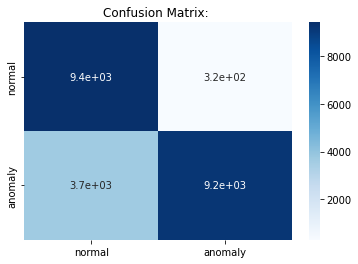

In [14]:
# find test set predictions
y_pred = classifier.predict(x_test)
# Calculating model accuracy metrics
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, cmap="Blues", annot=True, xticklabels=['normal', 'anomaly'], yticklabels=['normal', 'anomaly'])
plt.title("Confusion Matrix: ")
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc}")

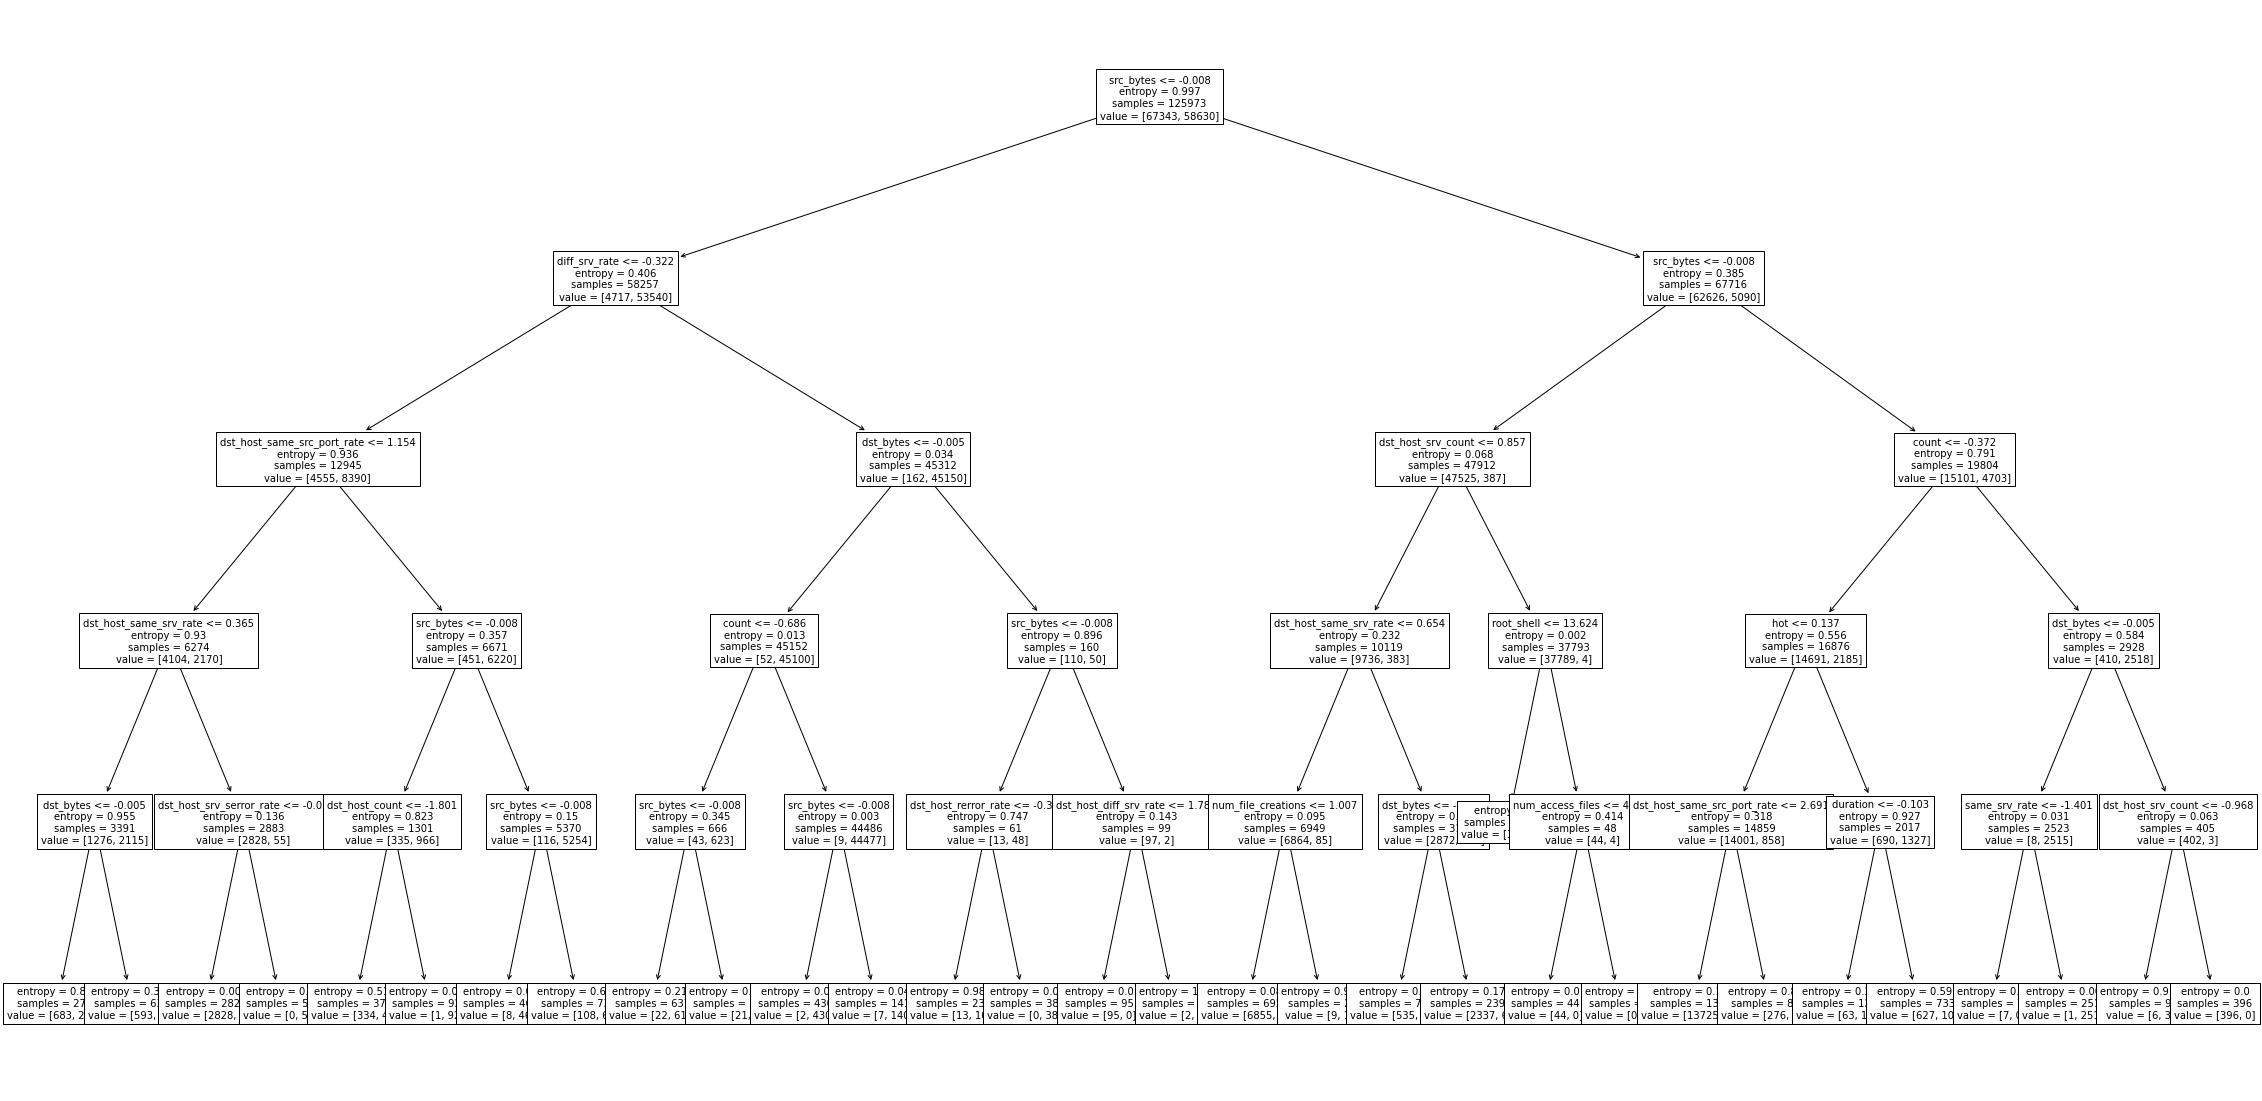

In [16]:
# Plot the decision tree
f = plt.figure()
f.set_figwidth(40)
f.set_figheight(20)
plot_tree(classifier, feature_names=cols_to_scale, fontsize=10)
plt.show()